<a href="https://colab.research.google.com/github/PrathikRamagiri/cats-vs-dogs/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dogs vs. Cats Classification

Select free T4 GPU in Runtime settings

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG

Downloading...
From (original): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG
From (redirected): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG&confirm=t&uuid=b68b1003-1e64-46f9-ac69-280ead9fdd6c
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:12<00:00, 67.1MB/s]


In [2]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_file:
    zip_file.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_file:
    zip_file.extractall('data/')

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths
base_dir = 'data/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

# Create directories
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)

# Split data
filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))

## Create data generators

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Create basic CNN classification model

In [5]:
from tensorflow.keras import models, layers

# Build the model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train basic model

In [6]:
history_model_basic = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 70ms/step - accuracy: 0.6000 - loss: 0.6553 - val_accuracy: 0.7634 - val_loss: 0.4925
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.7691 - loss: 0.4715 - val_accuracy: 0.8074 - val_loss: 0.4150
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8345 - loss: 0.3694 - val_accuracy: 0.8300 - val_loss: 0.3838
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8712 - loss: 0.2970 - val_accuracy: 0.8314 - val_loss: 0.3807
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.9156 - loss: 0.2012 - val_accuracy: 0.8348 - val_loss: 0.4408
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9564 - loss: 0.1125 - val_accuracy: 0.8336 - val_loss: 0.5837
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9842 - loss: 0.0513 - val_accuracy: 0.8292 - val_loss: 0.6614
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9894 - loss: 0.0336 - 

## Plot accuracy and loss

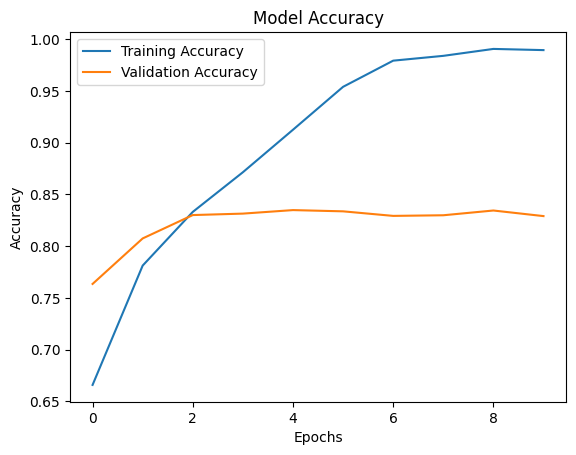

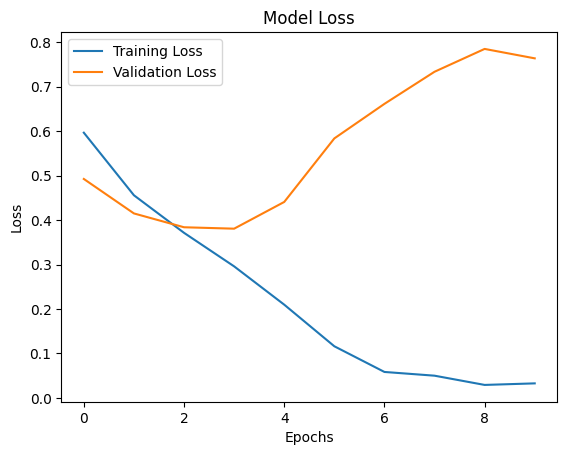

In [7]:
plt.plot(history_model_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_basic.history['loss'], label='Training Loss')
plt.plot(history_model_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Add regularization

Add different regularization methods as described in the lab instructions and evaluate results.

### Add Dropout

In [8]:
from tensorflow.keras import models, layers

# Build the model
model_dropout = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_dropout.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
history_model_dropout = model_dropout.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - accuracy: 0.5466 - loss: 0.7328 - val_accuracy: 0.6948 - val_loss: 0.5835
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.6836 - loss: 0.5869 - val_accuracy: 0.7328 - val_loss: 0.5278
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.7409 - loss: 0.5287 - val_accuracy: 0.7584 - val_loss: 0.4881
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.7779 - loss: 0.4677 - val_accuracy: 0.8056 - val_loss: 0.4255
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8001 - loss: 0.4296 - val_accuracy: 0.8134 - val_loss: 0.4136
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.8308 - loss: 0.3794 - val_accuracy: 0.8320 - val_loss: 0.3820
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.8430 - loss: 0.3618 - val_accuracy: 0.8354 - val_loss: 0.3853
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.8588 - loss: 0.3282 - 

PLot Accuracy and Lass

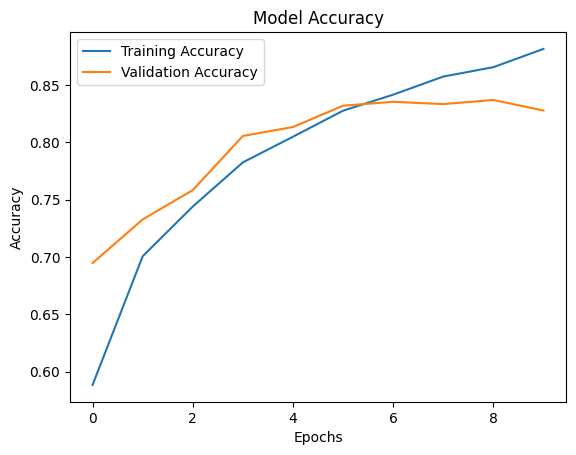

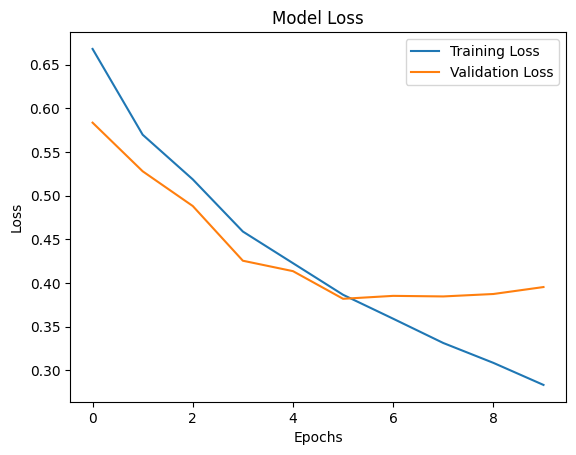

In [10]:
plt.plot(history_model_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_dropout.history['loss'], label='Training Loss')
plt.plot(history_model_dropout.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

L2 Regularization

In [11]:
from tensorflow.keras import models, layers, regularizers

# Define the model
model_l2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_l2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


L2 Model Training

In [12]:
history_model_l2 = model_l2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - accuracy: 0.5653 - loss: 0.8062 - val_accuracy: 0.6990 - val_loss: 0.6200
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7128 - loss: 0.5873 - val_accuracy: 0.7420 - val_loss: 0.5661
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.7440 - loss: 0.5530 - val_accuracy: 0.7682 - val_loss: 0.5183
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7697 - loss: 0.5170 - val_accuracy: 0.7546 - val_loss: 0.5316
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.7889 - loss: 0.4932 - val_accuracy: 0.7610 - val_loss: 0.5337
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.7912 - loss: 0.4830 - val_accuracy: 0.8046 - val_loss: 0.4782
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8035 - loss: 0.4721 - val_accuracy: 0.8026 - val_loss: 0.4892
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8163 - loss: 0.4596 - 

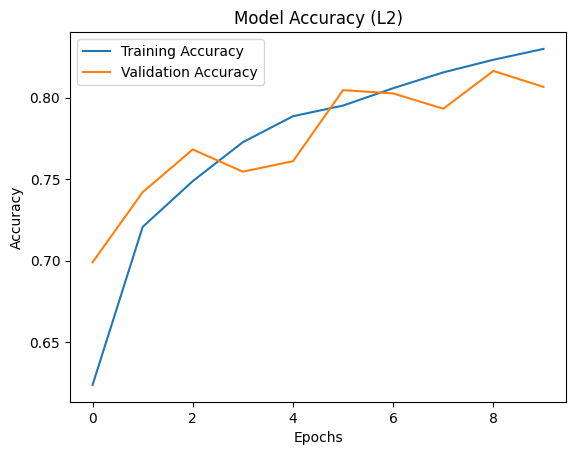

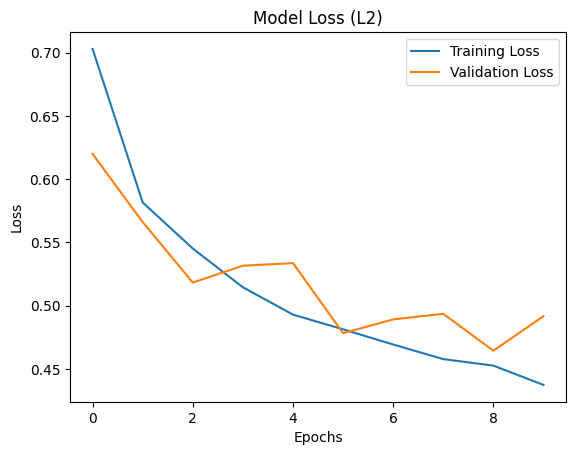

In [13]:
plt.plot(history_model_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (L2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_l2.history['loss'], label='Training Loss')
plt.plot(history_model_l2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (L2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


L2 and Dropout

In [14]:
from tensorflow.keras import models, layers, regularizers

model_combo1 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_combo1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [15]:
history_combo1 = model_combo1.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.5041 - loss: 0.9692 - val_accuracy: 0.5022 - val_loss: 0.7297
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.4974 - loss: 0.7209 - val_accuracy: 0.4978 - val_loss: 0.7049
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.4985 - loss: 0.7026 - val_accuracy: 0.4978 - val_loss: 0.6980
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.5041 - loss: 0.6973 - val_accuracy: 0.5022 - val_loss: 0.6956
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.5089 - loss: 0.6948 - val_accuracy: 0.5606 - val_loss: 0.6933
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.5296 - loss: 0.6923 - val_accuracy: 0.5578 - val_loss: 0.6902
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.5374 - loss: 0.6895 - val_accuracy: 0.5422 - val_loss: 0.6925
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.5309 - loss: 0.6912 - 

In [16]:
model_combo2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_combo2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [17]:
history_combo2 = model_combo2.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.5083 - loss: 1.1729 - val_accuracy: 0.5522 - val_loss: 0.7186
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.5050 - loss: 0.7110 - val_accuracy: 0.5022 - val_loss: 0.6987
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.4978 - loss: 0.6974 - val_accuracy: 0.5022 - val_loss: 0.6947
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.4976 - loss: 0.6944 - val_accuracy: 0.5022 - val_loss: 0.6936
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.5021 - loss: 0.6935 - val_accuracy: 0.4978 - val_loss: 0.6933
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.4986 - loss: 0.6933 - val_accuracy: 0.4978 - val_loss: 0.6932
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.5056 - loss: 0.6932 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.5016 - loss: 0.6932 - 

Plot Accuracy and Loss

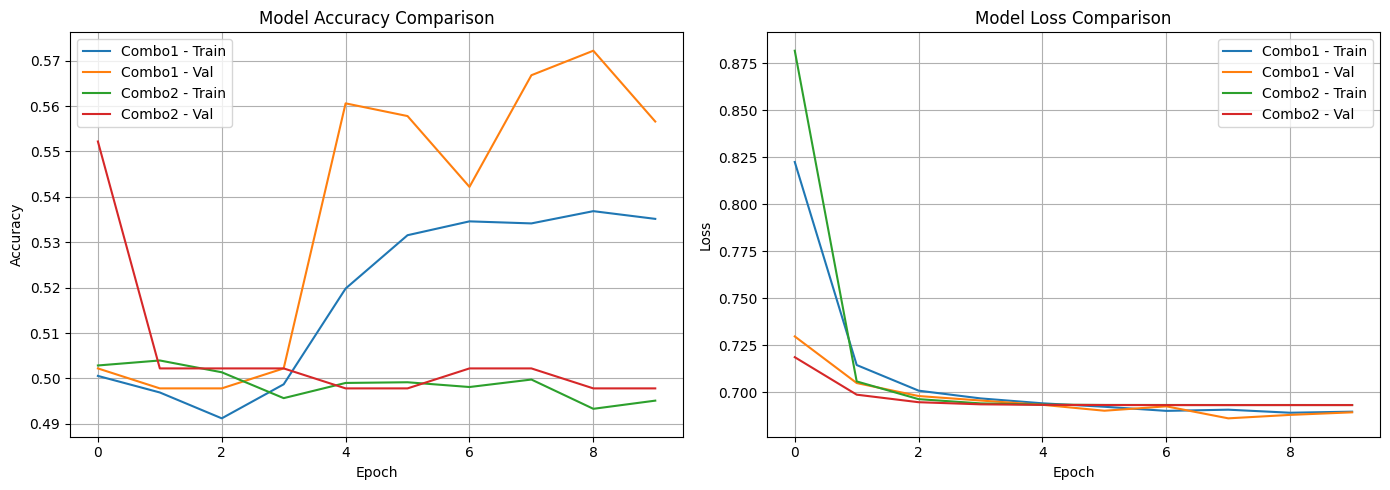

In [18]:
import matplotlib.pyplot as plt

# Set figure size for side-by-side plots
plt.figure(figsize=(14, 5))

# --- Accuracy Plot ---
plt.subplot(1, 2, 1)
plt.plot(history_combo1.history['accuracy'], label='Combo1 - Train')
plt.plot(history_combo1.history['val_accuracy'], label='Combo1 - Val')
plt.plot(history_combo2.history['accuracy'], label='Combo2 - Train')
plt.plot(history_combo2.history['val_accuracy'], label='Combo2 - Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Loss Plot ---
plt.subplot(1, 2, 2)
plt.plot(history_combo1.history['loss'], label='Combo1 - Train')
plt.plot(history_combo1.history['val_loss'], label='Combo1 - Val')
plt.plot(history_combo2.history['loss'], label='Combo2 - Train')
plt.plot(history_combo2.history['val_loss'], label='Combo2 - Val')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Final layout and save
plt.tight_layout()
plt.savefig('/content/combo_accuracy_loss.png')
plt.show()


Early Stopping

In [19]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
# Define the basic model
model_basic = models.Sequential([
layers.Input(shape=(150, 150, 3)),
layers.Conv2D(32, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(128, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(1, activation='sigmoid')
])
# Compile the model
model_basic.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']
)
# Create EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_basic = model_basic.fit(
train_generator,
epochs=10,
validation_data=val_generator,
callbacks=[early_stop]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.5979 - loss: 0.6630 - val_accuracy: 0.7622 - val_loss: 0.4899
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7832 - loss: 0.4605 - val_accuracy: 0.8024 - val_loss: 0.4340
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.8297 - loss: 0.3767 - val_accuracy: 0.8326 - val_loss: 0.3856
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8645 - loss: 0.3031 - val_accuracy: 0.8388 - val_loss: 0.3831
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9152 - loss: 0.2094 - val_accuracy: 0.8376 - val_loss: 0.4172
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9509 - loss: 0.1279 - val_accuracy: 0.8214 - val_loss: 0.4966
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.9718 - loss: 0.0768 - val_accuracy: 0.8246 - val_loss: 0.6201


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmented training data generator
train_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data generator (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Apply generators to directories
train_aug_generator = train_augmented.flow_from_directory(
    'data/train_split',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'data/val_split',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [21]:
from tensorflow.keras import models, layers, regularizers

# CNN with both Dropout and L2 Regularization
model_final = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_final.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [22]:
history_final = model_final.fit(
    train_aug_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 224ms/step - accuracy: 0.5040 - loss: 0.9459 - val_accuracy: 0.5022 - val_loss: 0.7222
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 225ms/step - accuracy: 0.4983 - loss: 0.7145 - val_accuracy: 0.5022 - val_loss: 0.7014
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 218ms/step - accuracy: 0.5098 - loss: 0.6999 - val_accuracy: 0.5022 - val_loss: 0.6974
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 219ms/step - accuracy: 0.5274 - loss: 0.6955 - val_accuracy: 0.5564 - val_loss: 0.6948
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 218ms/step - accuracy: 0.5409 - loss: 0.6925 - val_accuracy: 0.4978 - val_loss: 0.6955
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.4985 - loss: 0.6953 - val_accuracy: 0.4978 - val_loss: 0.6943
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 215ms/step - accuracy: 0.5025 - loss: 0.6941 - val_accuracy: 0.5022 - val_loss: 0.6937
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 215ms/step - accuracy: 0.4989 -

Plot accuracy and loss

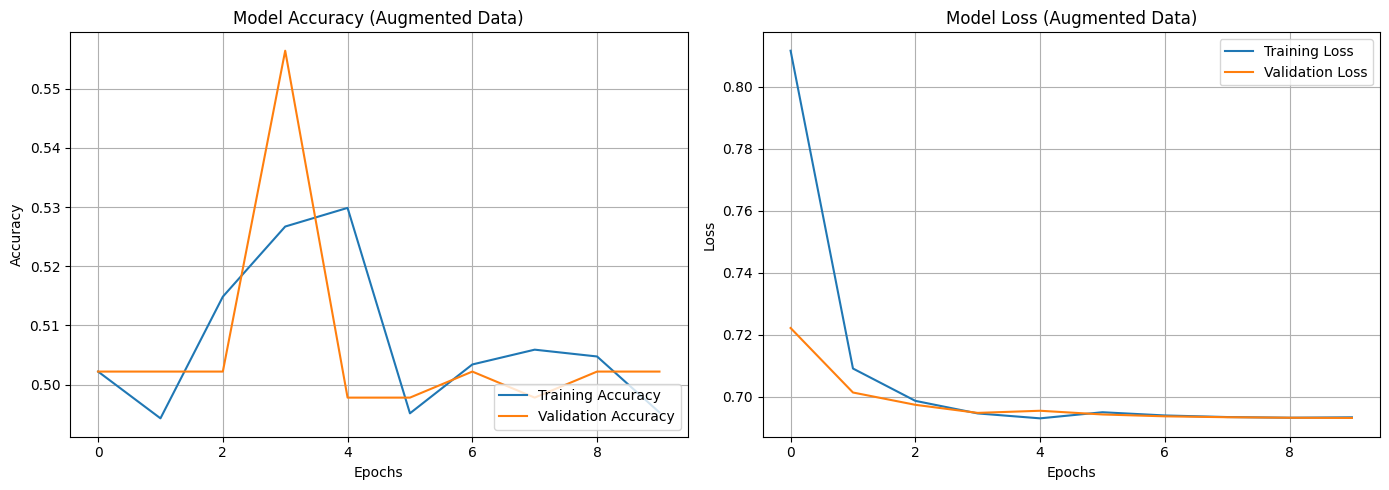

In [27]:
import matplotlib.pyplot as plt

# Create a figure with two side-by-side subplots
plt.figure(figsize=(14, 5))

# --- Accuracy Plot ---
plt.subplot(1, 2, 1)
plt.plot(history_final.history['accuracy'], label='Training Accuracy')
plt.plot(history_final.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Augmented Data)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# --- Loss Plot ---
plt.subplot(1, 2, 2)
plt.plot(history_final.history['loss'], label='Training Loss')
plt.plot(history_final.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Augmented Data)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# Layout and save the figure
plt.tight_layout()
plt.savefig('augmentation_accuracy_loss.png')  # Saves in current working directory
plt.show()

Confusion Matrix

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step


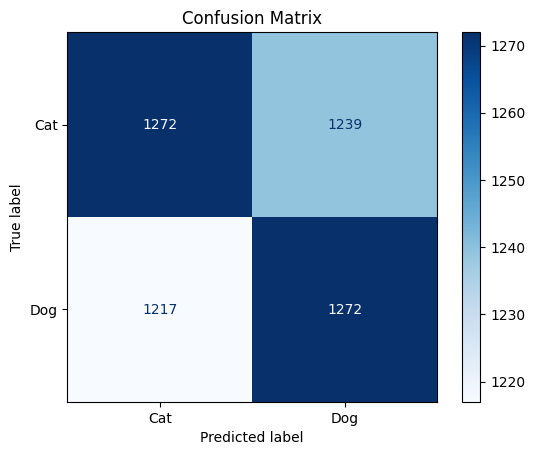

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Reset the validation generator
val_generator.reset()

# True labels
y_true = val_generator.classes

# Predict probabilities
y_pred_probs = model_basic.predict(val_generator, verbose=1)

# Convert to class predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")

# Save plot
plt.savefig('confusion_matrix.png')
plt.show()


Misclassified Sample

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


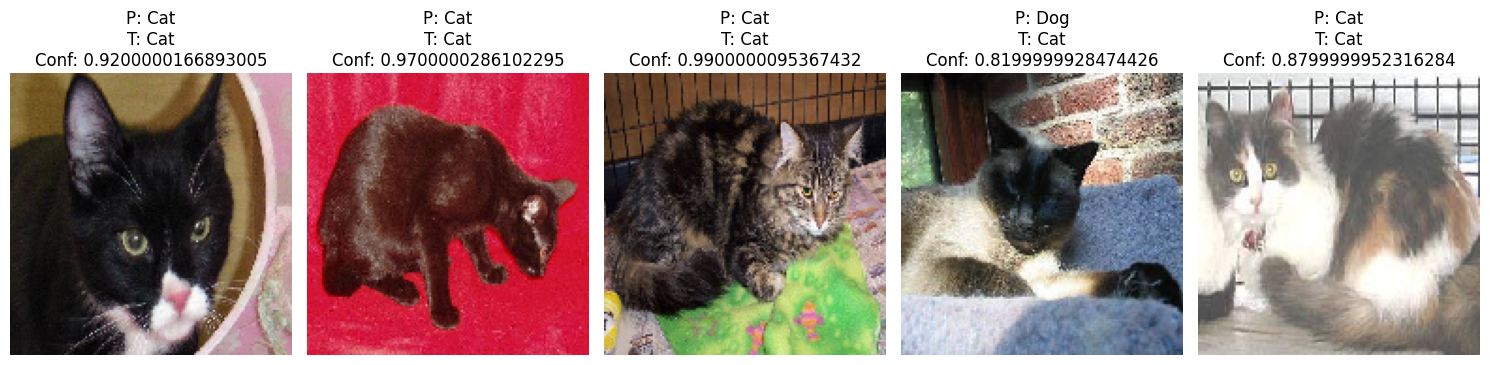

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# Get predictions
val_generator.reset()
y_pred_probs = model_basic.predict(val_generator, verbose=1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
y_true = val_generator.classes
filepaths = val_generator.filepaths

# Find misclassified indices
misclassified = np.where(y_pred != y_true)[0]

# Plot 5 misclassified samples
plt.figure(figsize=(15, 5))
for i, idx in enumerate(misclassified[:5]):
    # Load the image from filepath
    img_path = filepaths[idx]
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model_basic.predict(img_batch)[0][0]
    predicted_label = 'Dog' if pred > 0.5 else 'Cat'
    true_label = 'Dog' if y_true[idx] == 1 else 'Cat'
    confidence = round(pred if pred > 0.5 else 1 - pred, 2)

    # Plot
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"P: {predicted_label}\nT: {true_label}\nConf: {confidence}")

plt.tight_layout()
plt.savefig('misclassified_samples.png')
plt.show()
